<a href="https://colab.research.google.com/github/Arsanaibar/learn-machine-learning/blob/main/SK_Learn_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
df = pd.read_csv('sample_data/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [22]:
 df = df.rename(columns={'Gender': 'gender', 'Age': 'age',
                        'Annual Income (k$)': 'annual_income',
                        'Spending Score (1-100)': 'spending_score'})
 df['gender'].replace(['Female', 'Male'], [0, 1], inplace=True)
 df.head()

<ipython-input-22-7fcbec49d449>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gender'].replace(['Female', 'Male'], [0, 1], inplace=True)
<ipython-input-22-7fcbec49d449>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'].replace(['Female', 'Male'], [0, 1], inplace=True)


,CustomerID,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [23]:
from sklearn.cluster import KMeans

df = df.drop(['CustomerID','gender'], axis=1)

clusters = []
for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(df)
    clusters.append(km.inertia_)

In [24]:
df

,age,annual_income,spending_score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


Text(0, 0.5, 'Inertia')

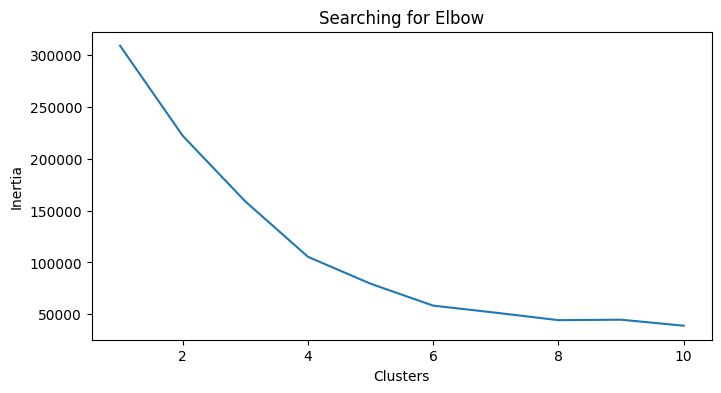

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')


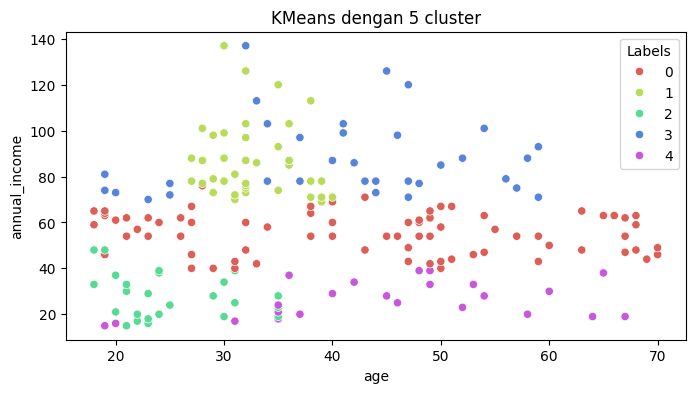

In [26]:
km5 = KMeans(n_clusters=5).fit(df)
df['Labels'] = km5.labels_

plt.figure(figsize=(8, 4))
sns.scatterplot(x=df['age'], y=df['annual_income'], hue=df['Labels'],
                palette=sns.color_palette('hls', 5))
plt.title('KMeans dengan 5 cluster')
plt.show()